# Comparison of the content of the dataset documentation approaches

Before using add the "metadata-elements.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [4]:
import itertools
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer

In [5]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]

## Load data

In [6]:
dfs = pd.read_excel("inputs/dataset/primary/metadata-elements.xlsx", sheet_name=None)
df_list = dfs["List"]
df_standanding_together = dfs["STANDING Together"]
del dfs["List"]
del dfs["codebook"]
del dfs["STANDING Together"]
display(dfs["Datasheet"])
display(df_list)

,Question or field,Metadata element
0,For what purpose was the dataset created? Was ...,Description of the purpose for creating the da...
1,"Who created the dataset (e.g., which team, res...",Information about the creators of the dataset
2,Who funded the creation of the dataset? If the...,Details about the funding of the dataset
3,Any other comments?,NaN
4,What do the instances that comprise the datase...,Description of the instances included in the d...
...,...,...
61,"Will the dataset be updated (e.g., to correct ...",Description of the dataset update plan
62,"If the dataset relates to people, are there ap...",Description of the dataset retention policy
63,Will older versions of the dataset continue to...,Description of the management plan for older v...
64,If others want to extend/augment/build on/cont...,Description of the methods to contribute to th...


,Metadata element
0,Description of the dataset
1,Information about dataset audit/review
2,Information about the dataset versioning approach
3,Version of the dataset associated with this da...
4,Information about the dataset documentation fo...
...,...
133,Link to design document
134,Description of the relevance of the data
135,Description and results of the requirement tes...
136,Description and results of the adversarial tes...


## Check if any metadata elements are too similar and should be regrouped into one

In [7]:
# Get a list of all metadata elements
metadata_elements_list = []
dict_documentation_metadata = {}
for sheet, df in dfs.items():
    metadata_elements = list(df["Metadata element"])
    metadata_elements = [
        x for x in metadata_elements if str(x) != "nan"
    ]  # remove nan value
    metadata_elements = [
        s.strip() for s in metadata_elements
    ]  # remove spaces ends of string
    metadata_elements = list(set(metadata_elements))  # keep only unique entries
    dict_documentation_metadata[sheet] = metadata_elements
    metadata_elements_list += metadata_elements

metadata_elements_list = list(set(metadata_elements_list))  # keep only unique entries

df = pd.DataFrame(metadata_elements_list, columns=["Metadata element"])
# df.to_excel("outputs/metadata_elements_list.xlsx", index=False)
print("There are ", len(metadata_elements_list), " metadata elements")
display(df)

There are  138  metadata elements


,Metadata element
0,Version of the dataset associated with this da...
1,Dataset size and other metrics
2,Description of the privacy handling
3,Description of the purpose for creating the da...
4,Recommendations when used in AI/ML systems
...,...
133,Link to design document
134,Familiarity of creators of this dataset docume...
135,Description of domain specific concepts for ge...
136,Description of who the dataset will be shared ...


In [8]:
# Encode metadata elements
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(metadata_elements_list)

# Get and save cosine similarity scores
similar_rows = []
unique_index_pairs = list(
    itertools.combinations(list(range(len(metadata_elements_list))), 2)
)
for index_pair in unique_index_pairs:
    i = index_pair[0]
    j = index_pair[1]
    element1 = metadata_elements_list[i]
    element2 = metadata_elements_list[j]
    cosine_similarity = np.dot(embeddings[i], embeddings[j]) / (
        np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
    )
    similar_rows.append([element1, element2, cosine_similarity])
df_similar = pd.DataFrame(
    similar_rows, columns=["Element 1", "Element 2", "cosine similarity score"]
)
df_similar = df_similar.sort_values(by="cosine similarity score", ascending=False)
display(df_similar)
df_similar.to_excel("outputs/metadata_elements_similarity.xlsx", index=False)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\BPatel\anaconda3\envs\dataset-documentation-env\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\BPatel\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Element 1,Element 2,cosine similarity score
84,Version of the dataset associated with this da...,Information about the dataset documentation fo...,0.954538
4127,Description of the undesirable uses of the dat...,Description of the intended use of the dataset,0.908756
469,Description of the purpose for creating the da...,Description of the intended use of the dataset,0.896263
8086,Information about the dataset documentation fo...,Information about the authors of this dataset ...,0.877440
96,Version of the dataset associated with this da...,Information about the authors of this dataset ...,0.868454
...,...,...,...
5077,Description of the dataset retention policy,Link to design document,-0.096966
2731,Recommendations when sampling the dataset,Description of other transformations,-0.099885
4792,Assumption in data fields not made explicit in...,Link to design document,-0.106389
7451,Description of the strategies to avoid undesir...,Last update date,-0.114775


Note: We ran this on the first version of our metadata element assignment where we had 146 unique metadata elements. We manually reviewed each pair of elements in descending order of cosine similarity value. We noticed that below a similarity score of 0.75, the elements were not similar and therefore we did not manually check below that. We identified 8 pairs of metadata elements that could be regrouped into one and ended up with a total of 138 unique metadata elements after that.

## View metadata elements and related questions/fields side-by-side for further review

In [9]:
documentation_list = list(dfs.keys())
retrouped_list = []
for metadata_element in metadata_elements_list:
    dict_questions = {}
    for sheet, df in dfs.items():
        df = df.loc[df["Metadata element"] == metadata_element]
        dict_questions[sheet] = list(df["Question or field"])
    count = 0
    not_all_nan = True
    while not_all_nan:
        row = []
        if count == 0:
            row.append(metadata_element)
        else:
            row.append(math.nan)
        for sheet in documentation_list:
            sheet_list = dict_questions[sheet]
            if len(sheet_list) > count:
                row.append(sheet_list[count])
            else:
                row.append(math.nan)
        if all(i != i for i in row):
            not_all_nan = False
        else:
            retrouped_list.append(row)
        count += 1
df_regrouped = pd.DataFrame(
    retrouped_list, columns=["Metadata element"] + documentation_list
)
display(df_regrouped)
df_regrouped.to_excel(
    "outputs/metadata_elements_regrouped_all_documentation_approaches.xlsx", index=False
)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card
0,Version of the dataset associated with this da...,NaN,Indicate which version of the dataset is being...,NaN,Is this datasheet created for the original ver...,Provide details about this version of the data...
1,Dataset size and other metrics,NaN,NaN,"Size, Sampling, and Filtering of Dataset",NaN,Provide a snapshot of the dataset:\n\n(Use the...
2,NaN,NaN,NaN,NaN,NaN,Provide a snapshot of the dataset:\n\n(Use the...
3,Description of the privacy handling,NaN,NaN,How is privacy handled?,NaN,NaN
4,Description of the purpose for creating the da...,For what purpose was the dataset created? Was ...,NaN,Problem and context that motivate why the data...,For what purpose was the dataset created? Was ...,Select one:\n\nPURPOSE(S)\nMonitoring\nResearc...
...,...,...,...,...,...,...
301,Description of domain specific concepts for ge...,NaN,NaN,"If relevant, brief summary of acronyms and dom...",NaN,NaN
302,Description of who the dataset will be shared ...,Will the dataset be distributed to third parti...,NaN,NaN,Will the dataset be distributed to third parti...,NaN
303,Description of the subpopulations identified i...,Does the dataset identify any subpopulations? ...,Does the dataset identify any subpopulations?,Population: population represented,Does the dataset identify any demographic subp...,NaN
304,NaN,NaN,Indicate subpopulation distributions within th...,NaN,NaN,NaN


## Analysis

### Comparison matrix

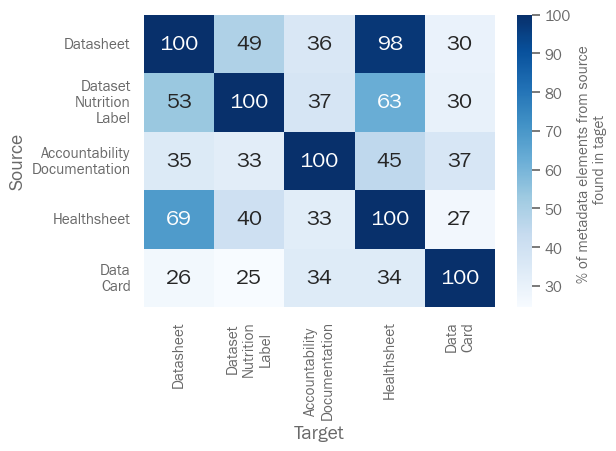

In [10]:
df_comparison = pd.DataFrame(
    index=list(dict_documentation_metadata.keys()),
    columns=list(dict_documentation_metadata.keys()),
    dtype=float,
)
for documentation1 in df_comparison.index:
    metadata_list_1 = dict_documentation_metadata[documentation1]
    for documentation2 in df_comparison.columns:
        metadata_list_2 = dict_documentation_metadata[documentation2]
        df_comparison.loc[documentation1, documentation2] = (
            len([i for i in metadata_list_1 if i in metadata_list_2])
            / len(metadata_list_1)
            * 100
        )

labels = []
for doc in dict_documentation_metadata.keys():
    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

df_comparison.to_excel("outputs/metadata_elements_comparison_matrix.xlsx", index=False)
ax = sns.heatmap(
    df_comparison,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap="Blues",
    fmt="0.0f",
    cbar_kws={"label": "% of metadata elements from source \n found in taget"},
)
ax.figure.axes[-1].yaxis.label.set_size(11)
ax.set_xlabel("Target", fontsize=14)
ax.set_ylabel("Source", fontsize=14)
plt.tight_layout()
plt.savefig("outputs/metadata_elements_comparison_matrix.png", dpi=200)

### Occurence of metadata elements accross dataset documentation

In [11]:
elements_count_list = []
for metadata_element in metadata_elements_list:
    row = [metadata_element]
    for sheet, df in dfs.items():
        if metadata_element in list(df["Metadata element"]):
            row.append("yes")
        else:
            row.append("no")
    row.append(len([i for i in row if i == "yes"]))
    elements_count_list.append(row)
df_element_count = pd.DataFrame(
    elements_count_list,
    columns=["Metadata element"] + list(dfs.keys()) + ["Count"],
)
df_element_count = df_element_count.sort_values(by=["Count"], ascending=False)
df_element_count.to_excel("outputs/metadata_elements_count.xlsx", index=False)
display(df_element_count)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
29,Dataset publication date,yes,yes,yes,yes,yes,5
37,Information about the owners of the dataset,yes,yes,yes,yes,yes,5
65,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5
84,Description of the dataset update plan,yes,yes,yes,yes,yes,5
118,Details about the funding of the dataset,yes,yes,yes,yes,yes,5
...,...,...,...,...,...,...,...
126,Information about the data collection cost,no,no,yes,no,no,1
133,Link to design document,no,no,yes,no,no,1
131,Keywords,no,yes,no,no,no,1
135,Description of domain specific concepts for ge...,no,no,yes,no,no,1


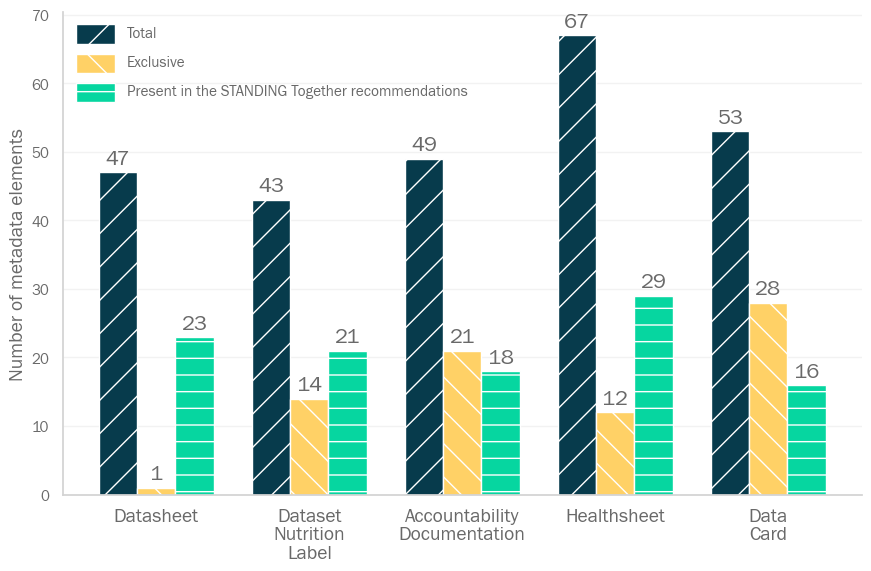

In [12]:
## Number of metadata elements and unique metadata elements per dataset documentation approach
count_metadata_elements = []
count_unique_metadata_elements = []
count_metadata_elements_in_st = []

st_metadata_element_list = list(set(df_standanding_together["Metadata element"]))

labels = []
for doc in list(dfs.keys()):
    count_metadata_elements.append(df_element_count[doc].value_counts().get("yes", 0))
    count_unique_metadata_elements.append(
        len(
            df_element_count[
                (df_element_count[doc] == "yes") & (df_element_count["Count"] == 1)
            ]
        )
    )

    list_in_st = [
        i for i in dict_documentation_metadata[doc] if i in st_metadata_element_list
    ]
    count_metadata_elements_in_st.append(len(list_in_st))

    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

# plot
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

width = 0.25
y_list = [
    count_metadata_elements,
    count_unique_metadata_elements,
    count_metadata_elements_in_st,
]
labels_list = ["Total", "Exclusive", "Present in the STANDING Together recommendations"]
x = np.arange(len(labels))
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, padding=3)
    count += 1

ax.set_xticks(x + width, labels, fontsize=14)
ax.set_ylabel("Number of metadata elements", fontsize=14)
ax.set_axisbelow(True)
leg = ax.legend(loc="upper left", labelspacing=1, handlelength=2.5, facecolor="white", frameon=False)
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
plt.grid(color="0.95", axis="y")

fig.tight_layout()
fig.savefig("outputs/metadata_elements_view.png", dpi=200)

In [13]:
df_common = df_element_count[df_element_count["Count"] == 5]
df_unique = df_element_count[df_element_count["Count"] == 1]
print(
    "There are",
    len(df_common),
    "metadata elements that are found in all five documentation approaches",
)
print(
    "There are",
    len(df_unique),
    "metadata elements that are found exclusively in one of the five documentation approaches",
)
display(df_common)

There are 7 metadata elements that are found in all five documentation approaches
There are 76 metadata elements that are found exclusively in one of the five documentation approaches


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
29,Dataset publication date,yes,yes,yes,yes,yes,5
37,Information about the owners of the dataset,yes,yes,yes,yes,yes,5
65,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5
84,Description of the dataset update plan,yes,yes,yes,yes,yes,5
118,Details about the funding of the dataset,yes,yes,yes,yes,yes,5
113,Description of the data collection process,yes,yes,yes,yes,yes,5
58,Description of the dataset sharing method,yes,yes,yes,yes,yes,5


In [14]:
# Least common
for dataset_documentation in dfs.keys():
    print("----- Unique metadata description in " + dataset_documentation + " -----")
    df_unique = df_element_count[
        (df_element_count["Count"] == 1)
        & (df_element_count[dataset_documentation] == "yes")
    ]
    display(df_unique)

----- Unique metadata description in Datasheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
63,Description of the possibilities to identify i...,yes,no,no,no,no,1


----- Unique metadata description in Dataset Nutrition Label -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
8,Description of representation issues that migh...,no,yes,no,no,no,1
7,Information about the metadata repository and ...,no,yes,no,no,no,1
40,Assumption in data fields not made explicit in...,no,yes,no,no,no,1
69,Description of the individual-level data,no,yes,no,no,no,1
66,Information about the format/structure of the ...,no,yes,no,no,no,1
51,Known issues with data collection,no,yes,no,no,no,1
42,Description of the involvement of the particip...,no,yes,no,no,no,1
44,Description of the proxy characteristics in th...,no,yes,no,no,no,1
99,Information about the people consulted to crea...,no,yes,no,no,no,1
98,Required domain-specific knowledge for proper ...,no,yes,no,no,no,1


----- Unique metadata description in Accountability Documentation -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
2,Description of the privacy handling,no,no,yes,no,no,1
41,List of related documents,no,no,yes,no,no,1
19,Expectations for people using the dataset,no,no,yes,no,no,1
24,Description of the relevance of the data,no,no,yes,no,no,1
73,Description of the data quality measurements,no,no,yes,no,no,1
50,Description of the ethical impact of the data ...,no,no,yes,no,no,1
47,Description and results of the requirement tes...,no,no,yes,no,no,1
46,Description of related datasets,no,no,yes,no,no,1
15,Link to requirements specification,no,no,yes,no,no,1
23,Description of the dataset processing process,no,no,yes,no,no,1


----- Unique metadata description in Healthsheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
38,Description of the accessibility measurements,no,no,no,yes,no,1
72,Countries where the data was collected,no,no,no,yes,no,1
68,Information about the dataset versioning approach,no,no,no,yes,no,1
64,Number of subjects represented in the dataset,no,no,no,yes,no,1
59,Description of the regulation preventing demog...,no,no,no,yes,no,1
55,Description of the choice(s) of language for c...,no,no,no,yes,no,1
10,Description of the strategies to avoid reident...,no,no,no,yes,no,1
80,Guidelines for creating new labels,no,no,no,yes,no,1
85,Information about the dataset documentation fo...,no,no,no,yes,no,1
108,Description of the confounding factors that mi...,no,no,no,yes,no,1


----- Unique metadata description in Data Card -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
4,Recommendations when used in AI/ML systems,no,no,no,no,yes,1
9,Description of annotations,no,no,no,no,yes,1
20,Information about the first version of the dat...,no,no,no,no,yes,1
21,Recommendations when sampling the dataset,no,no,no,no,yes,1
70,Description of the alignment of the dataset wi...,no,no,no,no,yes,1
67,Description and handling of mismatched values,no,no,no,no,yes,1
62,Information about risks when used with other data,no,no,no,no,yes,1
60,Recommendations when this data is used with ot...,no,no,no,no,yes,1
54,Description of limitations of the dataset comp...,no,no,no,no,yes,1
45,Description of the data selection and inclusio...,no,no,no,no,yes,1


### STANDING Together recommendations

In [15]:
# Metadata elements in the ST recommendations
st_recommendations = list(set(df_standanding_together["Question or field"]))
st_metadata_element_list = list(set(df_standanding_together["Metadata element"]))
len(st_recommendations)
len(st_metadata_element_list)
print(
    "There are",
    str(len(st_recommendations)),
    "recommendations for data documentation from the STANDING Together Program",
)
print("They cover", str(len(st_metadata_element_list)), "unique metadata elements")

There are 18 recommendations for data documentation from the STANDING Together Program
They cover 51 unique metadata elements


In [16]:
### ST metadata elements not found in any metadata
df_st_not_in_doc = df_standanding_together.loc[
    df_standanding_together["Is in List"] == "no", "Metadata element"
]
print(
    "There are",
    len(df_st_not_in_doc),
    "metadata elements from the STANDING Together recommendations that are not present in any documentation approaches",
)
df_st_not_in_doc.to_excel(
    "outputs/metadata_elements_from_st_not_in_any_doc.xlsx", index=False
)
display(df_st_not_in_doc)

There are 13 metadata elements from the STANDING Together recommendations that are not present in any documentation approaches


15    Description of adherence to principles for dat...
20          Competing interest amongst dataset creators
23                Reasons for the choice of data origin
29    Description of potential aggregation bias intr...
30             Description of the data shifts over time
40                        Description of synthetic data
43             Description of attempt to mitigiate bias
47    Description of potential bias introduced by th...
48    Description of the data protection laws have b...
51         Description of the governance of the dataset
52    Description of the adherence to principles tha...
54    Description of any efforts to share data and f...
55    Description of formal assessment of bias or so...
Name: Metadata element, dtype: object